In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import glob
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
import matplotlib.cm as cm
import matplotlib.colors as mcolors

from packing_viz_functions import get_atom_df

%config InlineBackend.figure_format = 'png2x'

In [18]:
directory = r"\\wsl$\Ubuntu-18.04\home\arlenlex\LIGGGHTS_SEAICE\lexi_tests\floe_testing\floe_generation\post2d"

final_df2 = get_atom_df(directory, 1e-05)

In [2]:
directory = r"\\wsl$\Ubuntu-18.04\home\arlenlex\LIGGGHTS_SEAICE\lexi_tests\floe_testing\floe_generation\post3d"

final_df = get_atom_df(directory, 5e-06)

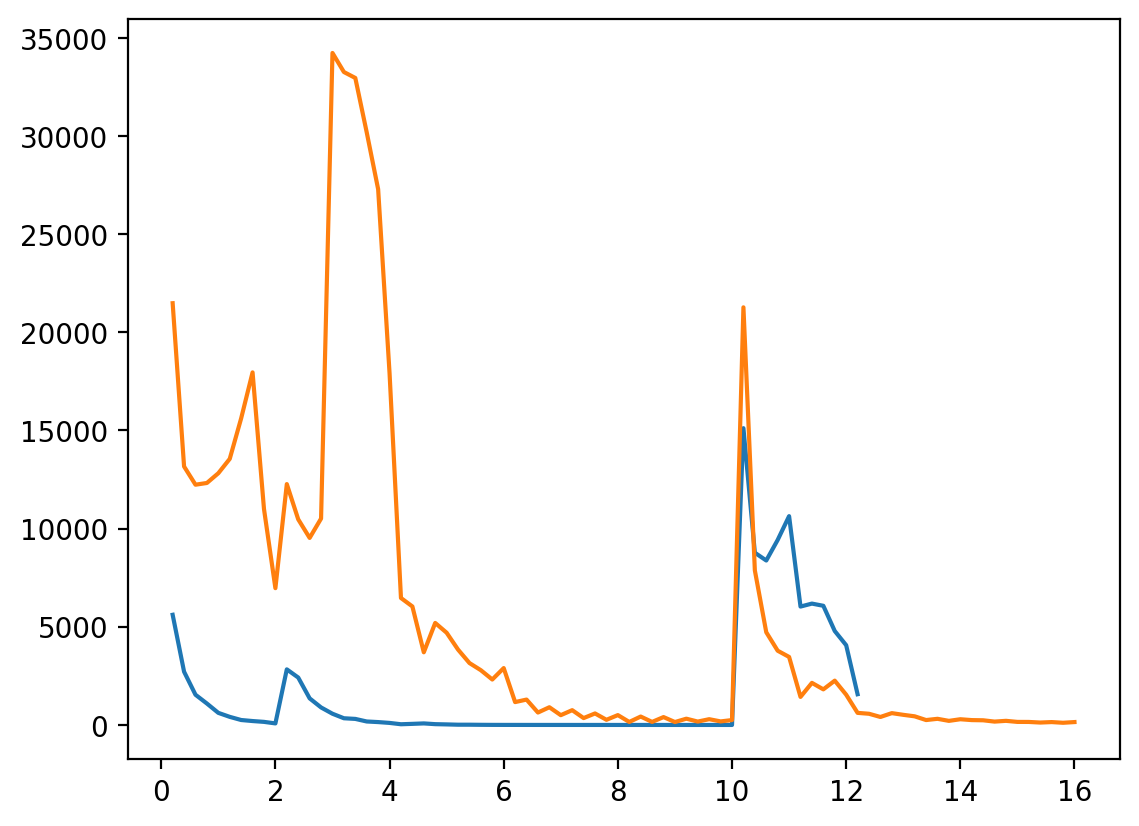

In [23]:
data = final_df.xs('fmag', level=1,axis=1).mean(axis=1).values
t = final_df.xs('fmag', level=1,axis=1).mean(axis=1).index
data2 = final_df2.xs('fmag', level=1,axis=1).mean(axis=1).values
t2 = final_df2.xs('fmag', level=1,axis=1).mean(axis=1).index
plt.plot(t[1:], data[1:])
plt.plot(t2[1:], data2[1:])


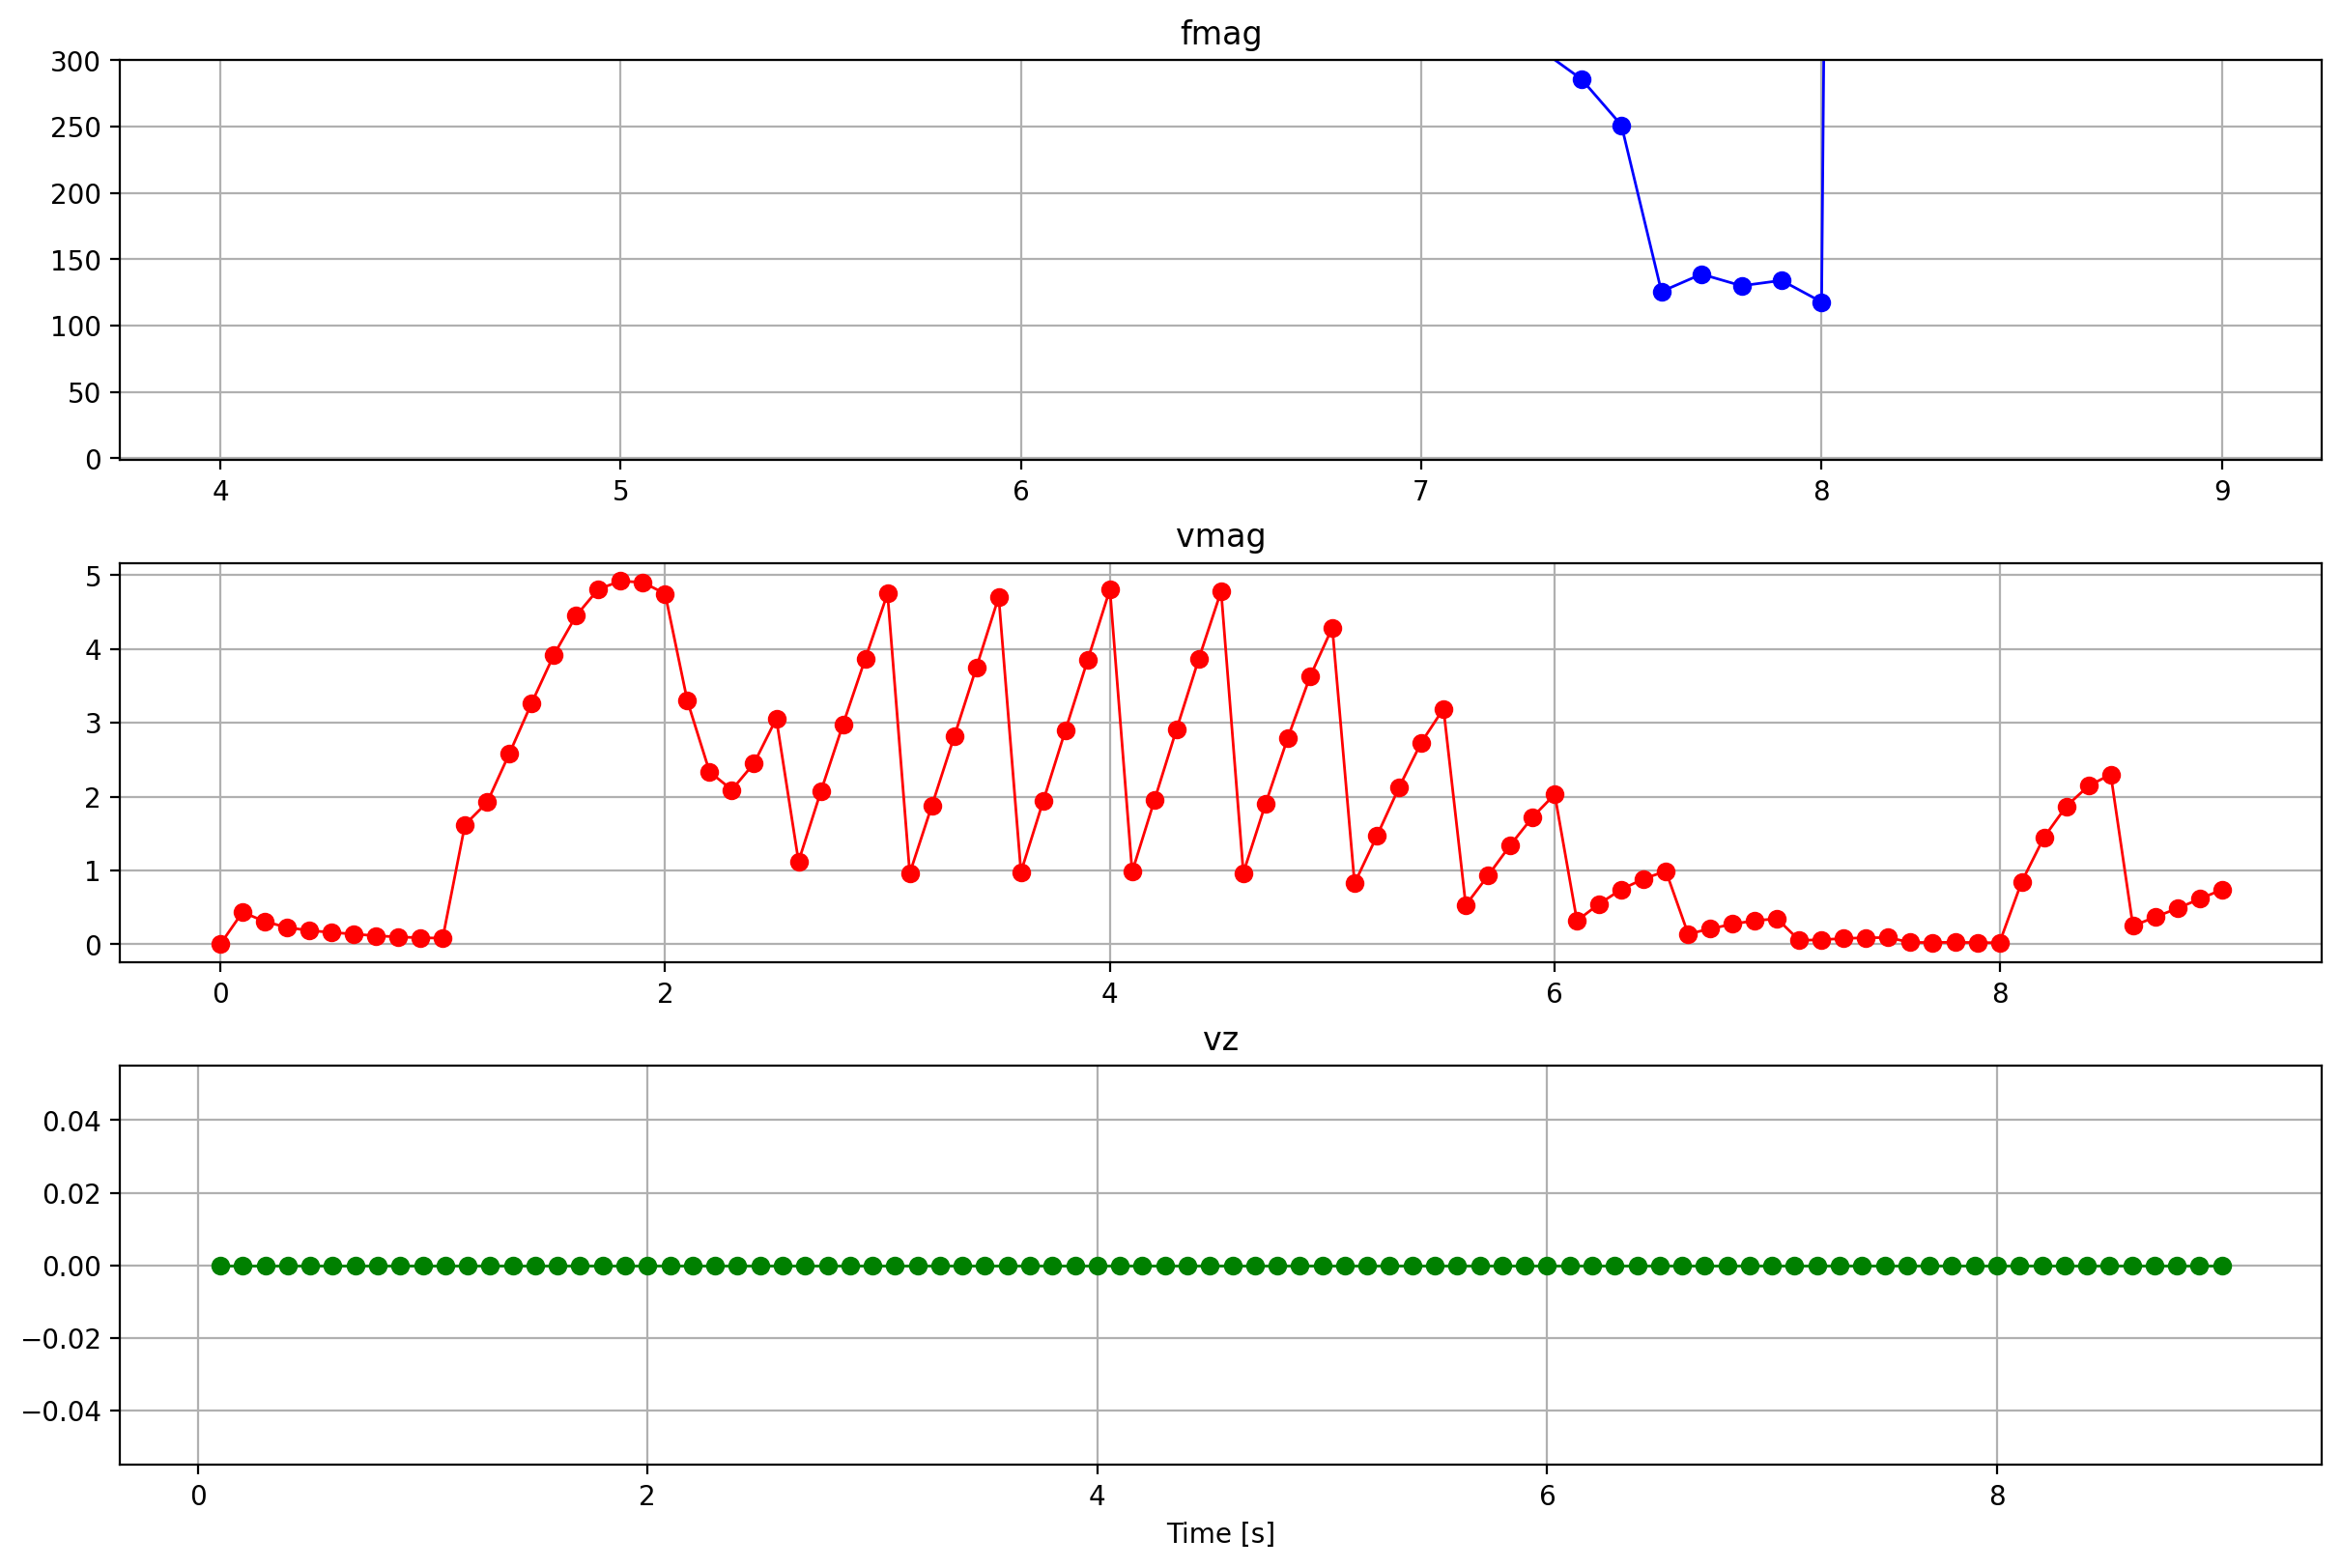

In [15]:
# Calculate the average coordination number at each timestep
fig, ax = plt.subplots(3,1, layout = 'constrained', figsize = (12,8))

plt.sca(ax[0])
var = 'fmag'
data = final_df.xs(var, axis=1, level=1).mean(axis=1)
plt.plot(data.index[40:], data.values[40:], 'bo-',lw = 1)
plt.ylim(-1,300)
plt.title(var)
plt.grid(True)

plt.sca(ax[1])
var = 'vmag'
data = final_df.xs(var, axis=1, level=1).mean(axis=1)
plt.plot(data.index, data.values, 'ro-', lw = 1)
plt.title(var)
plt.grid(True)

plt.sca(ax[2])
var = 'vz'
data = final_df.xs(var, axis=1, level=1).mean(axis=1)
plt.plot(data.index[1:], data.values[1:], 'go-',lw = 1)
plt.xlabel('Time [s]')
plt.title(var)
plt.grid(True)
plt.show()


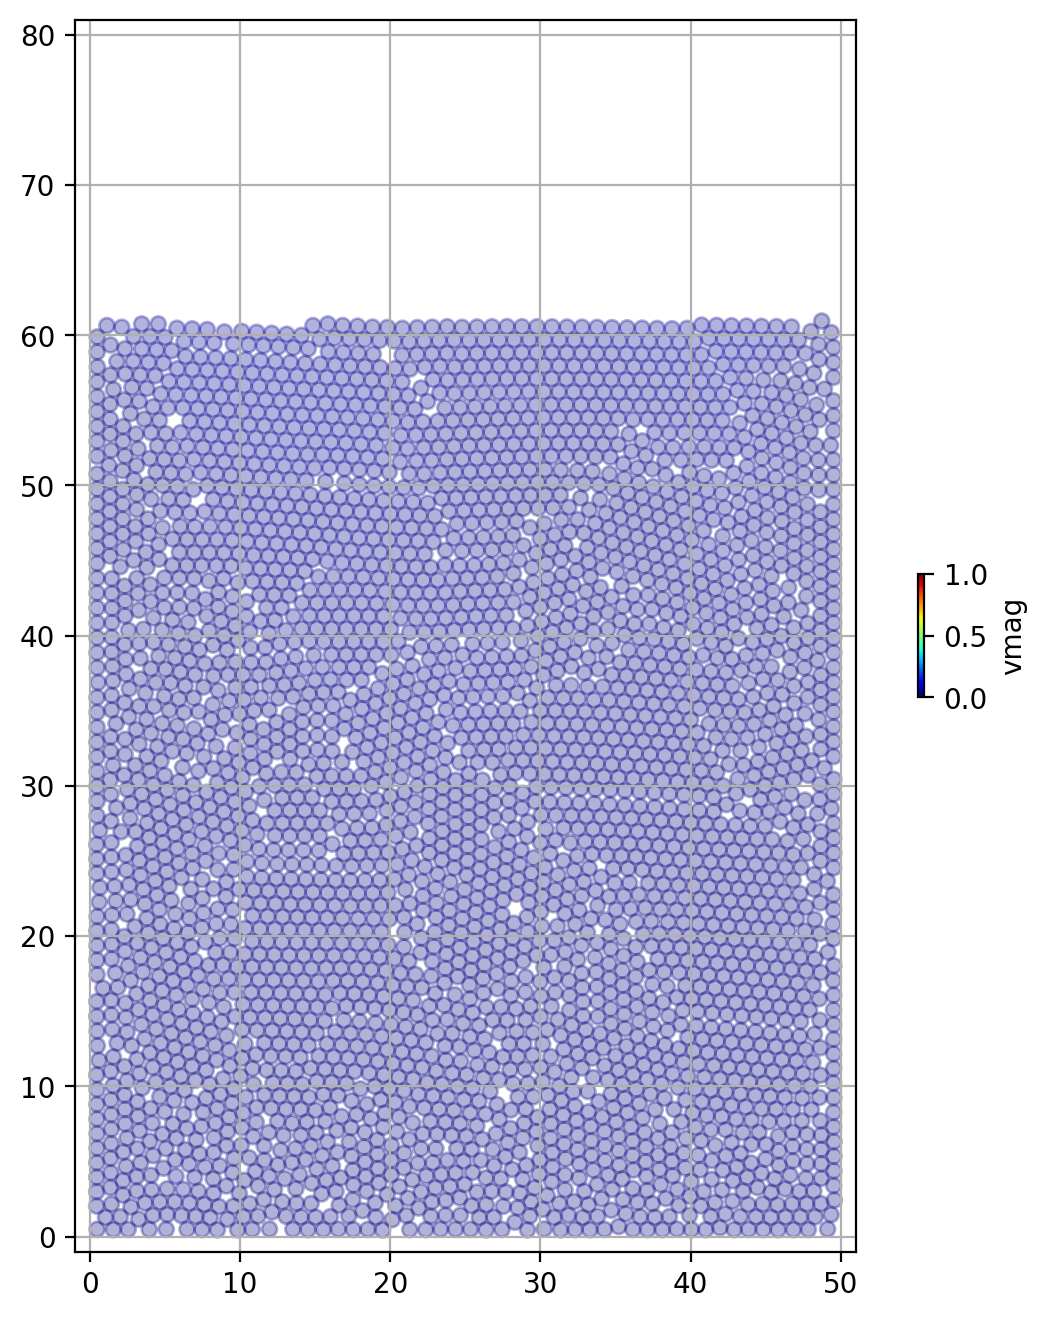

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))

# Dictionary to store circle objects for each atom
circles = {}

# Assuming df_atom has already been defined and structured correctly
unique_atoms = set(idx[0] for idx in final_df.keys())

var = 'vmag'

def quant_to_color(coord_num, norm, cmap):
    # Normalize the coordination number for color mapping
    normed = norm(coord_num)
    return cmap(normed)

# Get the colormap and normalization for coordination numbers
cmap = cm.jet # You can use other colormaps like 'plasma', 'inferno', etc.
quant = final_df.xs(var, axis=1, level=1).values.flatten()
norm = mcolors.Normalize(vmin=quant.min().min(), vmax=1)#vmax=quant.max().max())
# Create colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set array to empty as it's not needed for a ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink =0.1)
cbar.set_label(var)

i=-1
# Initialize circles at their initial positions
ids = []
for atom_id in unique_atoms:

    initial_x = final_df[(atom_id, 'x')].iloc[i]
    initial_y = final_df[(atom_id, 'y')].iloc[i]
    radius = final_df[(atom_id, 'radius')].iloc[i]
    id = final_df[(atom_id, 'id')].iloc[i]
    if np.isnan(initial_x):
        ids.append(id)
    circle = Circle((initial_x, initial_y), radius, alpha=0.3)

    # set color based on quantity
    val = final_df[(atom_id, var)].iloc[i]
    color = quant_to_color(val, norm, cmap)  # Get color based on coordination number
    id = final_df[(atom_id, 'id')].iloc[i]
    
    circle.set_color(color)
    ax.add_patch(circle)

# Set the plot limits manually
ax.set_xlim(-1, 51)
ax.set_ylim(-1, 81)
ax.set_aspect('equal', 'box')
ax.grid()

plt.show()

In [9]:
len(ids)

0

In [5]:
# Get SIC

n_atoms = 0
for atom_id in unique_atoms:
    x = final_df[(atom_id, 'x')].iloc[i]
    y = final_df[(atom_id, 'y')].iloc[i]
    if (x <=50 ) & (y <= 50):
        n_atoms+=1

ball_area = n_atoms*np.pi*0.5**2
total_area = 50 * 50
print(f'sic = {ball_area/total_area}')

sic = 0.8922123136195013


MovieWriter Pillow unavailable; using Pillow instead.


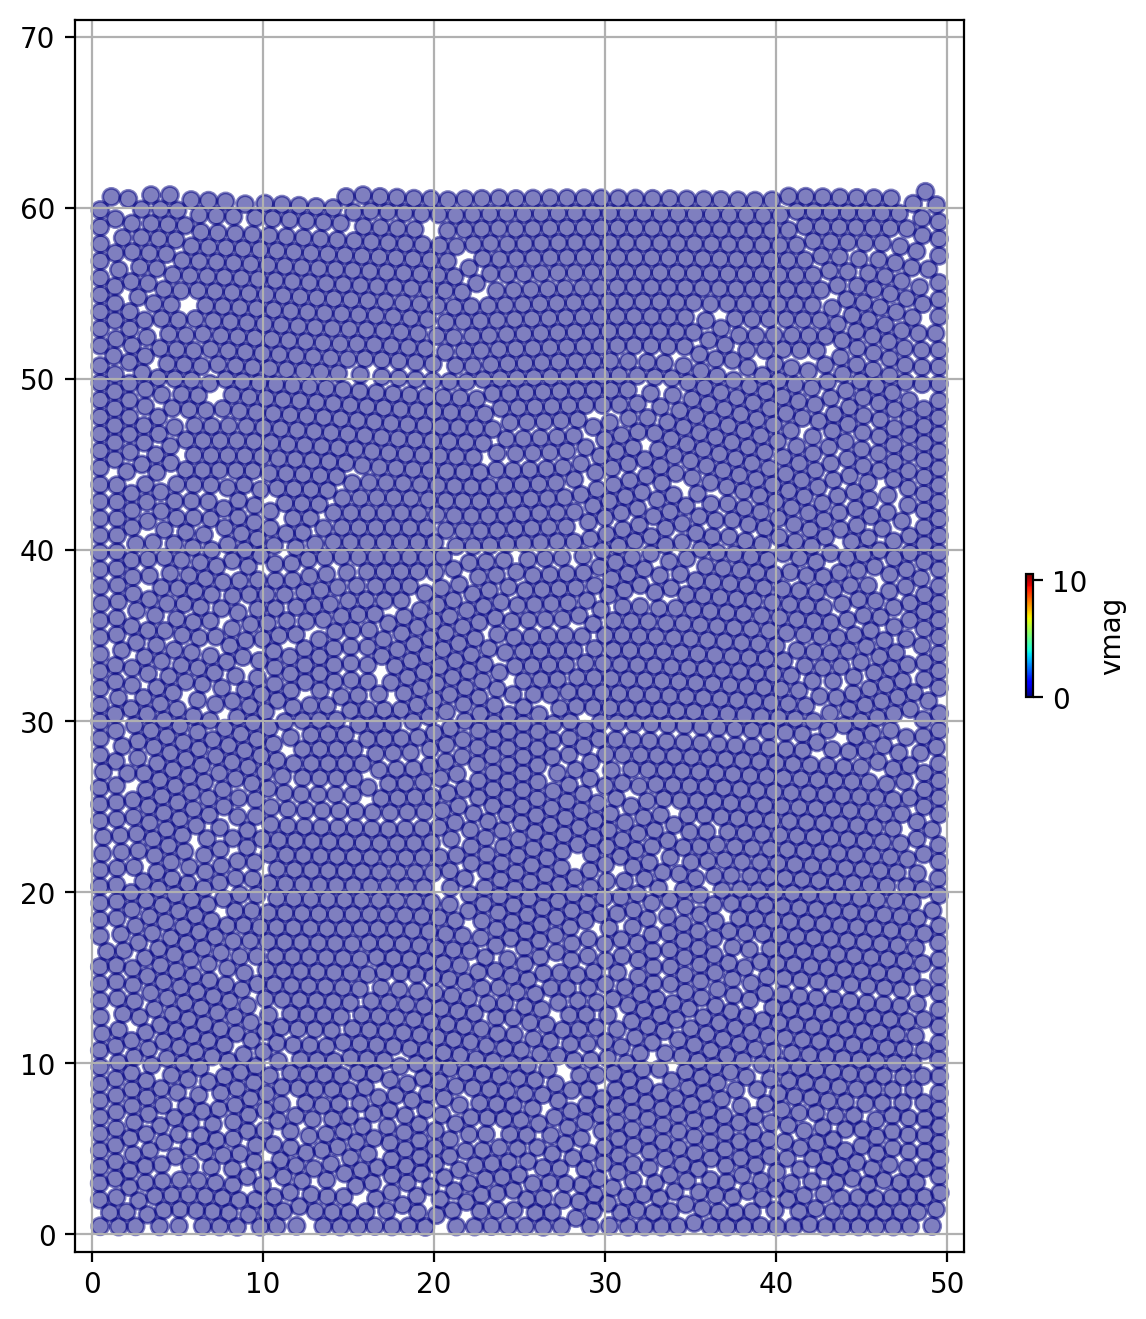

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))

# Dictionary to store circle objects for each atom
circles = {}

# Assuming df_atom has already been defined and structured correctly
unique_atoms = set(idx[0] for idx in final_df.keys())

# Initialize circles at their initial positions
for atom_id in unique_atoms:

    initial_x = final_df[(atom_id, 'x')].iloc[0]
    initial_y = final_df[(atom_id, 'y')].iloc[0]
    radius = final_df[(atom_id, 'radius')].iloc[0]
    circle = Circle((initial_x, initial_y), radius, color='blue', alpha=0.5)
    ax.add_patch(circle)
    circles[atom_id] = circle

# Set the plot limits manually
ax.set_xlim(-1, 51)
ax.set_ylim(-1, 71)
ax.set_aspect('equal', 'box')
ax.grid()

var = 'vmag'

def quant_to_color(coord_num, norm, cmap):
    # Normalize the coordination number for color mapping
    normed = norm(coord_num)
    return cmap(normed)

# Get the colormap and normalization for coordination numbers
cmap = cm.jet # You can use other colormaps like 'plasma', 'inferno', etc.
quant = final_df.xs(var, axis=1, level=1).values.flatten()
norm = mcolors.Normalize(vmin=quant.min().min(), vmax=quant.max().max())
# Create colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set array to empty as it's not needed for a ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink =0.1)
cbar.set_label(var)

# Update function for animation
def update(frame):
    for atom_id in unique_atoms:
        new_x = final_df[(atom_id, 'x')].iloc[frame]
        new_y = final_df[(atom_id, 'y')].iloc[frame]
        new_rad = final_df[(atom_id, 'radius')].iloc[frame]
    
        # Get the coordination number for the current atom and frame
        coord_num = final_df[(atom_id, var)].iloc[frame]
        color = quant_to_color(coord_num, norm, cmap)  # Get color based on coordination number
        
        circles[atom_id].center = (new_x, new_y)
        circles[atom_id].set_color(color)  # Update the color based on coordination number
        circles[atom_id].set_radius(new_rad)

    return circles.values()


# Animation parameters
N = 1  # Frame skip value
frame_indices = range(0, len(final_df[(next(iter(unique_atoms)), 'x')]), N)

# Create and save the animation
anim = FuncAnimation(fig, update, frames=frame_indices, blit=True, repeat=True)
anim.save('gifs/floe_tests/pack/3d_U_mono_collapse_bondready.gif', writer='Pillow', fps=5)  # Adjust fps as needed

plt.show()

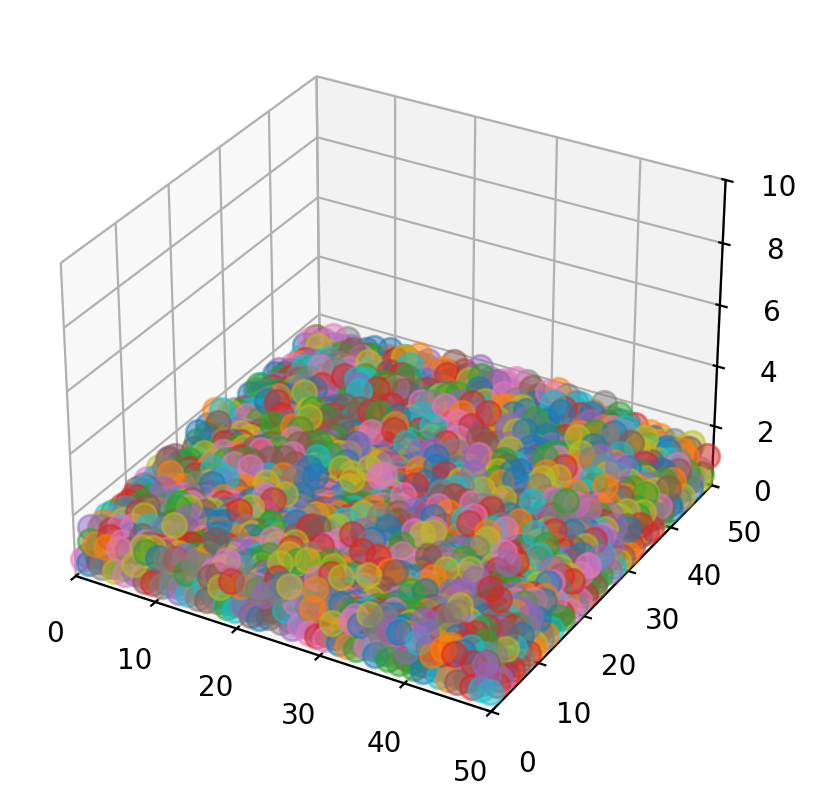

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dictionary to store sphere parameters for each atom
spheres = {}

# Assuming df_atom has already been defined and structured correctly
unique_atoms = set(idx[0] for idx in final_df.keys())

# Initialize spheres at their initial positions
for atom_id in unique_atoms:
    initial_x = final_df[(atom_id, 'x')].iloc[-1]
    initial_y = final_df[(atom_id, 'y')].iloc[-1]
    initial_z = final_df[(atom_id, 'z')].iloc[-1]
    radius = final_df[(atom_id, 'radius')].iloc[-1]
    # Instead of adding patches, we plot spheres by plotting points with size calculated from radius
    sphere = ax.scatter(initial_x, initial_y, initial_z, s=100*np.pi*radius**2, alpha=0.5)
    spheres[atom_id] = sphere

# Set the plot limits manually
ax.set_xlim(0, 50)
ax.set_ylim(0, 50.0)
ax.set_zlim(0, 10)
ax.set_aspect('auto')

# You can also add color mapping and other features as needed

# Show plot for a single timestep, no need for the animation loop
plt.show()
